

{% include toc title="In This Lesson" icon="file-text" %}



This lesson covers the key spatial attributes that are needed to work with

spatial data including: Coordinate Reference Systems (CRS), Extent and spatial resolution.



<div class='notice--success' markdown="1">



## <i class="fa fa-graduation-cap" aria-hidden="true"></i> Learning Objectives



After completing this tutorial, you will be able to:



* Be able to describe what a Coordinate Reference System (`CRS`) is

* Be able to list the steps associated with plotting 2 datasets stored using different coordinate reference systems.

* Be able to list 2-3 fundamental differences between a geographic and a projected `CRS`.

* Become familiar with the Universal Trans Mercator (UTM) and Geographic (WGS84) CRSs



## <i class="fa fa-check-square-o fa-2" aria-hidden="true"></i> What you need



You will need a computer with internet access to complete this lesson and the data for week 5 of the course.



[<i class="fa fa-download" aria-hidden="true"></i> Download Week 5 Data (~500 MB)](https://ndownloader.figshare.com/files/7525363){:data-proofer-ignore='' .btn }



</div>



## Intro to coordinate reference systems



The short video below highlights how map projections can make continents

look proportionally larger or smaller than they actually are.



<iframe width="560" height="315" src="https://www.youtube.com/embed/KUF_Ckv8HbE" frameborder="0" allowfullscreen></iframe>



## What is a Coordinate Reference System



To define the location of something we often use a coordinate system. This system

consists of an X and a Y value located within a 2 (or more) -dimensional space.



<figure>

	<a href="http://open.senecac.on.ca/clea/label/projectImages/15_276_xy-grid.jpg">

	<img src="http://open.senecac.on.ca/clea/label/projectImages/15_276_xy-grid.jpg" alt="We use coordinate systems with X, Y (and sometimes Z axes) to

	define the location of objects in space."></a>

	<figcaption> We use coordinate systems with X, Y (and sometimes Z axes) to

	define the location of objects in space.

	Source: http://open.senecac.on.ca

	</figcaption>

</figure>



While the above coordinate system is 2-dimensional, we live on a 3-dimensional

earth that happens to be "round". To define the location of objects on the earth, which is round, we need

a coordinate system that adapts to the Earth's shape. When we make maps on paper

or on a flat computer screen, we move from a 3-Dimensional space (the globe) to

a 2-Dimensional space (our computer

screens or a piece of paper). The components of the CRS define how the

"flattening" of data that exists in a 3-D globe space. The CRS also defines the

the coordinate system itself.



<figure>

	<a href="http://ayresriverblog.com/wp-content/uploads/2011/05/image.png">

	<img src="http://ayresriverblog.com/wp-content/uploads/2011/05/image.png" alt="A CRS defines the translation between a location on the round earth

	and that same location, on a flattened, 2 dimensional coordinate system."></a>

	<figcaption>A CRS defines the translation between a location on the round earth

	and that same location, on a flattened, 2 dimensional coordinate system.

	Source: http://ayresriverblog.com

	</figcaption>

</figure>



> A coordinate reference system (CRS) is a

coordinate-based local, regional or global system used to locate geographical

entities. -- Wikipedia



## The Components of a CRS



The coordinate reference system is made up of several key components:



* **Coordinate System:** the X, Y grid upon which our data is overlayed and how we define where a point is located in space.

* **Horizontal and vertical units:** The units used to define the grid along the

x, y (and z) axis.

* **Datum:** A modeled version of the shape of the earth which defines the

origin used to place the coordinate system in space. We will explain this further,

below.

* **Projection Information:** the mathematical equation used to flatten objects

that are on a round surface (e.g. the earth) so we can view them on a flat surface

(e.g. our computer screens or a paper map).



## Why CRS is Important



It is important to understand the coordinate system that your data uses -

particularly if you are working with different data stored in different coordinate

systems. If you have data from the same location that are stored in different

coordinate reference systems, **they will not line up in any GIS or other program**

unless you have a program like ArcGIS or QGIS that supports **projection on the

fly**. Even if you work in a tool that supports projection on the fly, you will

want to all of your data in the same projection for performing analysis and processing

tasks.



<i class="fa fa-star"></i> **Data Tip:** Spatialreference.org provides an

excellent <a href="http://spatialreference.org/ref/epsg/" target="_blank">online

library of CRS information.</a>

{: .notice}



### Coordinate System & Units



We can define a spatial location, such as a plot location, using an x- and a

y-value - similar to our cartesian coordinate system displayed in the figure,

above.



For example, the map below, generated in `R` with `ggplot2` shows all of the

continents in the world, in a `Geographic` Coordinate Reference System. The

units are Degrees and the coordinate system itself is **latitude** and

**longitude** with the `origin` being the location where the equator meets

the central meridian on the globe (0,0).






In [3]:
# ```{r load-libraries, warning=F, message=F }

# # load libraries

# library(rgdal)

# library(ggplot2)

# library(rgeos)

# library(raster)



# # set your working directory

# # setwd("~/Documents/data")

# ```

import earthlab as et
import geopandas as gpd
from shapely.geometry import Point
from glob import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.ion()

In [5]:
path_data = et.data.get_data('week_05')

Replace is False and data exists, so doing nothing. Use replace==True to re-download the data.


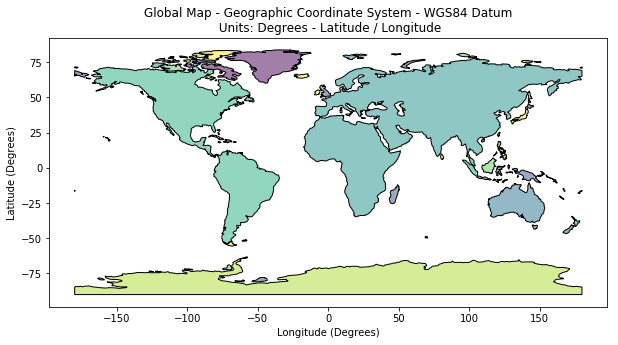

In [6]:
worldBound = gpd.read_file(path_data + "/global/ne_110m_land/ne_110m_land.shp")
ax = worldBound.plot(figsize=(10, 5))
ax.set(xlabel="Longitude (Degrees)", ylabel="Latitude (Degrees)",
       title="Global Map - Geographic Coordinate System - WGS84 Datum\n Units: Degrees - Latitude / Longitude")

# ```{r load-plot-data, fig.cap="world map plot"}

# # read shapefile

# worldBound <- readOGR(dsn="data/week5/global/ne_110m_land",

#                       layer="ne_110m_land")



# # convert to dataframe

# worldBound_df <- fortify(worldBound)



# # plot map

# worldMap <- ggplot(worldBound_df, aes(long,lat, group=group)) +

#   geom_polygon() +

#   xlab("Longitude (Degrees)") + ylab("Latitude (Degrees)") +

#   coord_equal() +

#   ggtitle("Global Map - Geographic Coordinate System - WGS84 Datum\n Units: Degrees - Latitude / Longitude")



# worldMap

# ```




We can add three coordinate locations to our map. Note that the UNITS are

in decimal **degrees** (latitude, longitude):



* Boulder, Colorado:  40.0274, -105.2519

* Oslo, Norway: 59.9500, 10.7500

* Mallorca, Spain: 39.6167, 2.9833



Let's create a second map with the locations overlayed on top of the continental

boundary layer.




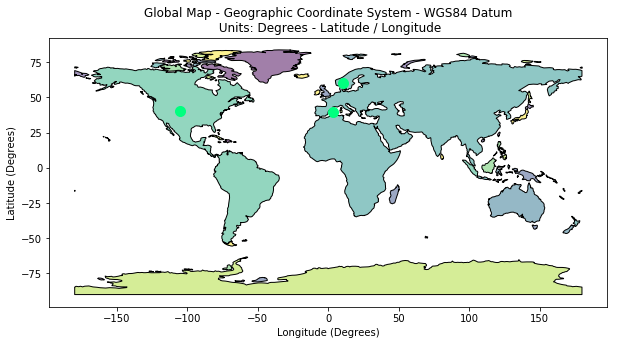

In [7]:
add_points = np.array([[-105.2519, 10.7500, 2.9833], [40.0274, 59.9500, 39.6167]])
ax.plot(*add_points, 'o', color='springgreen', ms=10)
ax.figure

# ```{r add-lat-long-locations, fig.cap="Map plotted using geographic projection with location points added." }

# # define locations of Boulder, CO and Oslo, Norway

# # store them in a data.frame format

# loc.df <- data.frame(lon=c(-105.2519, 10.7500, 2.9833),

#                 lat=c(40.0274, 59.9500, 39.6167))



# # only needed if the above is a spatial points object

# # loc.df <- fortify(loc)



# # add a point to the map

# mapLocations <- worldMap +

#                 geom_point(data=loc.df,

#                 aes(x=lon, y=lat, group=NULL), colour = "springgreen",

#                       size=5)



# mapLocations + theme(legend.position="none")



# ```




## Geographic CRS - The Good & The Less Good



Geographic coordinate systems in decimal degrees are helpful when we need to

locate places on the Earth. However, latitude and longitude

locations are not located using uniform measurement units. Thus, geographic

CRSs are not ideal for measuring distance. This is why other projected `CRS`

have been developed.





<figure>

	<a href="{{ site.baseurl }}/images/course-materials/earth-analytics/week-5/LatLongfromGlobeCenter-ESRI.gif">

	<img src="{{ site.baseurl }}/images/course-materials/earth-analytics/week-5/LatLongfromGlobeCenter-ESRI.gif" alt="Graphic showing lat long as it's placed over the globe by ESRI."></a>

	<figcaption>A geographic coordinate system locates latitude and longitude

	location using angles. Thus the spacing of each line of latitude moving north

	and south is not uniform.

	Source: ESRI

	</figcaption>

</figure>



## Projected CRS - Robinson



We can view the same data above, in another CRS - `Robinson`. `Robinson` is a

**projected** `CRS`. Notice that the country boundaries on the map - have a

different shape compared to the map that we created above in the `CRS`:

**Geographic lat/long WGS84**.




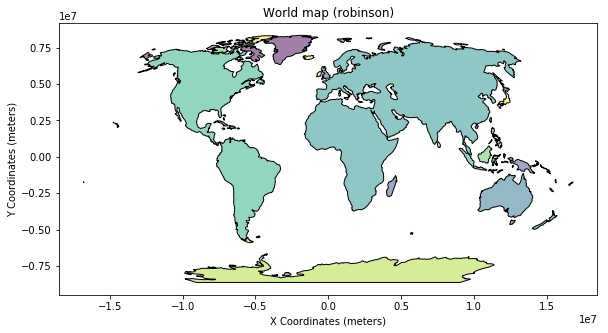

In [8]:
worldBound_robin = worldBound.to_crs('+proj=robin')
ax = worldBound_robin.plot(figsize=(10, 5))
ax.set(title="World map (robinson)", xlabel="X Coordinates (meters)",
       ylabel="Y Coordinates (meters)")

# ```{r global-map-robinson, fig.cap="Map reprojected to robinson projection." }

# # reproject from longlat to robinson

# worldBound_robin <- spTransform(worldBound,

#                                 CRS("+proj=robin"))



# worldBound_df_robin <- fortify(worldBound_robin)



# # force R to plot x and y values without rounding digits

# options(scipen=100)



# robMap <- ggplot(worldBound_df_robin, aes(long,lat, group=group)) +

#   geom_polygon() +

#   labs(title="World map (robinson)") +

#   xlab("X Coordinates (meters)") + ylab("Y Coordinates (meters)") +

#   coord_equal()



# robMap

# ```




Now what happens if you try to add the same Lat / Long coordinate locations that

we used above, to our map, with the `CRS` of `Robinsons`?




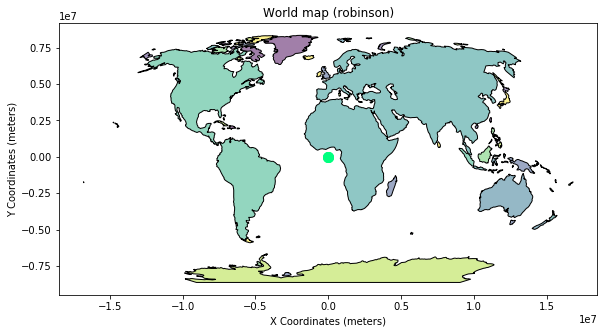

In [9]:
ax.plot(*add_points, 'o', color='springgreen', ms=10)
ax.figure

# ```{r add-locations-robinson, fig.cap="map with point locations added - robinson projection." }

# # add a point to the map

# newMap <- robMap + geom_point(data=loc.df,

#                       aes(x=lon, y=lat, group=NULL),

#                       colour = "springgreen",

#                       size=5)



# newMap + theme(legend.position="none")



# ```




Notice above that when we try to add lat/long coordinates in degrees, to a map

in a different `CRS`, that the points are not in the correct location. We need

to first convert the points to the  new projection - a process often referred

to as **reprojection** but performed by the `spTransform()` function in `R`.




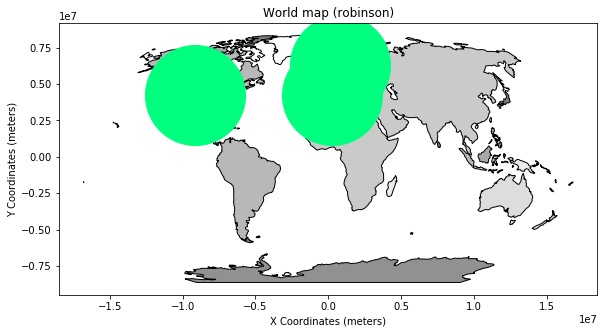

In [10]:
geometry = [Point(xy) for xy in add_points.T]
df = pd.DataFrame(geometry, columns=['geometry'])
df = gpd.GeoDataFrame(df, crs=worldBound.crs)
df_robin = df.to_crs(worldBound_robin.crs)

# Now plot
ax = worldBound_robin.plot(figsize=(10, 5), cmap='Greys')
ax.set(title="World map (robinson)", xlabel="X Coordinates (meters)",
       ylabel="Y Coordinates (meters)")
df_robin.plot(ax=ax, markersize=100, color='springgreen')

# ```{r reproject-robinson, fig.cap="Map plotted using robinson projection."}

# # define locations of Boulder, CO and Oslo, Norway

# loc.df



# # convert to spatial Points data frame

# loc.spdf <- SpatialPointsDataFrame(coords = loc.df, data=loc.df,

#                             proj4string=crs(worldBound))



# loc.spdf

# # reproject data to Robinson

# loc.spdf.rob <- spTransform(loc.spdf, CRSobj = CRS("+proj=robin"))



# loc.rob.df <- as.data.frame(cbind(loc.spdf.rob$lon, loc.spdf.rob$lat))

# # rename each column

# names(loc.rob.df ) <- c("X","Y")



# # convert spatial object to a data.frame for ggplot

# loc.rob <- fortify(loc.rob.df)



# # notice the coordinate system in the Robinson projection (CRS) is DIFFERENT

# # from the coordinate values for the same locations in a geographic CRS.

# loc.rob



# # add a point to the map

# newMap <- robMap + geom_point(data=loc.rob,

#                       aes(x=X, y=Y, group=NULL),

#                       colour = "springgreen",

#                       size=5)



# newMap + theme(legend.position="none")



# ```




## Compare Maps



Both of the plots above look visually different and also use a different

coordinate system. Let's look at both, side by side, with the actual **graticules**

or latitude and longitude lines rendered on the map.




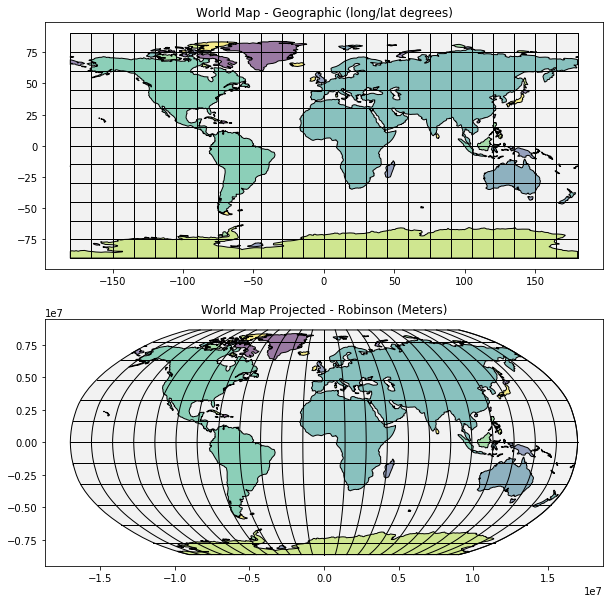

In [11]:
# Load data for lines
graticule = gpd.read_file(path_data + "/global/ne_110m_graticules_all/ne_110m_graticules_15.shp")
bbox = gpd.read_file(path_data + "/global/ne_110m_graticules_all/ne_110m_wgs84_bounding_box.shp")

graticule_robinson = graticule.to_crs('+proj=robin')
bbox_robinson = bbox.to_crs('+proj=robin')

# Plot each map
fig, axs = plt.subplots(2, 1, figsize=(10, 10))

ax = axs[0]
bbox.plot(ax=ax, alpha=.1, color='grey')
graticule.plot(ax=ax, color='k')
worldBound.plot(ax=ax)
ax.set(title="World Map - Geographic (long/lat degrees)")

ax = axs[1]
bbox_robinson.plot(ax=ax, alpha=.1, color='grey')
graticule_robinson.plot(ax=ax, color='k')
worldBound_robin.plot(ax=ax)
_ = ax.set(title="World Map Projected - Robinson (Meters)")

In [12]:
# ```{r plot-w-graticules, message=FALSE, warning=FALSE, results='hide', fig.cap="plots in different projections, side by side."}

# # this is not taught in the lesson but use it to display ggplot next to each other

# require(gridExtra)



# # turn off axis elements in ggplot for better visual comparison

# newTheme <- list(theme(line = element_blank(),

#       axis.text.x = element_blank(),

#       axis.text.y = element_blank(),

#       axis.ticks = element_blank(), # turn off ticks

#       axis.title.x = element_blank(), # turn off titles

#       axis.title.y = element_blank(),

#       legend.position="none")) # turn off legend



# ## add graticules

# graticule <- readOGR("data/week5/global/ne_110m_graticules_all",

#                      layer="ne_110m_graticules_15")

# # convert spatial object into a ggplot ready, data.frame

# graticule_df <- fortify(graticule)



# bbox <- readOGR("data/week5/global/ne_110m_graticules_all", layer="ne_110m_wgs84_bounding_box")

# bbox_df<- fortify(bbox)





# latLongMap <- ggplot(bbox_df, aes(long,lat, group=group)) +

#   geom_polygon(fill="white") +

#   geom_polygon(data=worldBound_df, aes(long,lat, group=group, fill=hole)) +

#   geom_path(data=graticule_df, aes(long, lat, group=group), linetype="dashed", color="grey70") +

#   labs(title="World Map - Geographic (long/lat degrees)") +

#   coord_equal() + newTheme +

#   scale_fill_manual(values=c("black", "white"), guide="none") # change colors & remove legend



# latLongMap <- latLongMap + geom_point(data=loc.df,

#                       aes(x=lon, y=lat, group=NULL),

#                       colour="springgreen",

#                       size=5)



# # reproject grat into robinson

# graticule_robin <- spTransform(graticule, CRS("+proj=robin"))  # reproject graticule

# grat_df_robin <- fortify(graticule_robin)

# bbox_robin <- spTransform(bbox, CRS("+proj=robin"))  # reproject bounding box

# bbox_robin_df <- fortify(bbox_robin)



# # plot using robinson



# finalRobMap <- ggplot(bbox_robin_df, aes(long,lat, group=group)) +

#   geom_polygon(fill="white") +

#   geom_polygon(data=worldBound_df_robin, aes(long,lat, group=group, fill=hole)) +

#   geom_path(data=grat_df_robin, aes(long, lat, group=group), linetype="dashed", color="grey70") +

#   labs(title="World Map Projected - Robinson (Meters)") +

#   coord_equal() + newTheme +

#   scale_fill_manual(values=c("black", "white"), guide="none") # change colors & remove legend



# # add a point to the map

# finalRobMap <- finalRobMap + geom_point(data=loc.rob,

#                       aes(x=X, y=Y, group=NULL),

#                       colour="springgreen",

#                       size=5)





# # display side by side

# grid.arrange(latLongMap, finalRobMap)



# ```






## Why Multiple CRS?



You may be wondering, why bother with different CRSs if it makes our

analysis more complicated? Well, each `CRS` is optimized to best represent:



* Shape and/or

* Scale / distance and/or

* Area



of features in the data. And no one CRS is great at optimizing shape, distance AND

area. Some CRSs are optimized for shape, some distance, some area. Some

CRSs are also optimized for particular regions -

for instance the United States, or Europe. Discussing `CRS` as it optimizes shape,

distance and area is beyond the scope of this tutorial, but it's important to

understand that the `CRS` that you chose for your data, will impact working with

the data!



<div class="notice--warning" markdown="1">



## <i class="fa fa-pencil-square-o" aria-hidden="true"></i> Test your knowledge



1. Compare the maps of the globe above. What do you notice about the shape of the

various countries. Are there any signs of distortion in certain areas on either

map? Which one is better?



2. Look at the image below which depicts maps of the United States in 4 different

`CRS`s. What visual differences do you notice in each map? Look up each projection

online, what elements (shape,area or distance) does each projection used in

the graphic below optimize?



</div>




In [14]:
# ```{r challenge-1, echo=FALSE}



# ## notes about robinson -- you will see distortion above 40 = 45 degrees latitude

# ## it is optimized for the latitudes between 0-45 (north and south).



# ## geographic - notice that the latitude lines are closer together are you move

# ## north...



# # What each CRS optimizes:

# ## Mercator:

# ## ALbers Equal Area

# ## UTM Zone 11n

# ## Geographic WGS84 (lat/lon):

# ```
